In [1]:
from google.cloud import storage
import pandas as pd


In [4]:
df_iter = pd.read_csv('gs://steam-reviews-bucket/landing/steam_reviews.csv', chunksize=1000000)

df = pd.DataFrame(df_iter.get_chunk(200000))

print(f"Loaded DataFrame shape: {df.shape}")
print(df.head())


Loaded DataFrame shape: (200000, 23)
   Unnamed: 0  app_id                  app_name  review_id  language  \
0           0  292030  The Witcher 3: Wild Hunt   85185598  schinese   
1           1  292030  The Witcher 3: Wild Hunt   85185250  schinese   
2           2  292030  The Witcher 3: Wild Hunt   85185111  schinese   
3           3  292030  The Witcher 3: Wild Hunt   85184605   english   
4           4  292030  The Witcher 3: Wild Hunt   85184287  schinese   

                                              review  timestamp_created  \
0                            不玩此生遗憾，RPG游戏里的天花板，太吸引人了         1611381629   
1                                 拔DIAO无情打桩机--杰洛特!!!         1611381030   
2                                              巫师3NB         1611380800   
3  One of the best RPG's of all time, worthy of a...         1611379970   
4                                                 大作         1611379427   

   timestamp_updated  recommended  votes_helpful  ...  steam_purchase  \
0     

In [5]:
print(f"Shape of the dataset: {df.shape}")
print("\nColumn Names:")
print(df.columns)

df.head()

Shape of the dataset: (200000, 23)

Column Names:
Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [8]:
missing_values = df.isnull().sum()

print("Missing Values Per Column:")
print(missing_values)

print("\nPercentage of Missing Values Per Column:")
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)


Missing Values Per Column:
Unnamed: 0                          0
app_id                              0
app_name                            0
review_id                           0
language                            0
review                            572
timestamp_created                   0
timestamp_updated                   0
recommended                         0
votes_helpful                       0
votes_funny                         0
weighted_vote_score                 0
comment_count                       0
steam_purchase                      0
received_for_free                   0
written_during_early_access         0
author.steamid                      0
author.num_games_owned              0
author.num_reviews                  0
author.playtime_forever             0
author.playtime_last_two_weeks      0
author.playtime_at_review           0
author.last_played                  0
dtype: int64

Percentage of Missing Values Per Column:
Unnamed: 0                        0.000
app_

In [9]:
df_cleaned = df.dropna(subset=['review'])

print(f"Shape of the dataset after dropping rows with missing reviews: {df_cleaned.shape}")

print(f"Missing values in 'review' column after cleaning: {df_cleaned['review'].isnull().sum()}")


Shape of the dataset after dropping rows with missing reviews: (199428, 23)
Missing values in 'review' column after cleaning: 0


In [10]:
df_cleaned.columns = df_cleaned.columns.str.replace(' ', '_').str.lower()


print("Updated Column Names:")
print(df_cleaned.columns)

Updated Column Names:
Index(['unnamed:_0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')


In [12]:
df_cleaned = df_cleaned.copy()

if 'unnamed:_0' in df_cleaned.columns:
    df_cleaned.drop(columns=['unnamed:_0'], inplace=True)
    print("Dropped column 'unnamed:_0'.")

print(f"Updated Dataset Shape: {df_cleaned.shape}")
print("Updated Column Names:")
print(df_cleaned.columns)


Updated Dataset Shape: (199428, 22)
Updated Column Names:
Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')


In [13]:
numeric_stats = df_cleaned.describe()
print("Summary Statistics for Numeric Variables:")
print(numeric_stats)

date_columns = ['timestamp_created', 'timestamp_updated', 'author.last_played']
for col in date_columns:
    print(f"Min and Max for {col}:")
    print(f"Min: {df_cleaned[col].min()}, Max: {df_cleaned[col].max()}")

categorical_columns = ['app_name', 'language', 'recommended', 'steam_purchase', 'received_for_free']
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df_cleaned[col].value_counts())


Summary Statistics for Numeric Variables:
         app_id     review_id  timestamp_created  timestamp_updated  \
count  199428.0  1.994280e+05       1.994280e+05       1.994280e+05   
mean   292030.0  7.072861e+07       1.591975e+09       1.592390e+09   
std         0.0  7.739033e+06       1.108992e+07       1.119946e+07   
min    292030.0  6.031088e+07       1.577016e+09       1.577016e+09   
25%    292030.0  6.317536e+07       1.581187e+09       1.581456e+09   
50%    292030.0  6.986915e+07       1.590548e+09       1.591011e+09   
75%    292030.0  7.754722e+07       1.602683e+09       1.603888e+09   
max    292030.0  8.518560e+07       1.611382e+09       1.611388e+09   

       votes_helpful    votes_funny  weighted_vote_score  comment_count  \
count  199428.000000  199428.000000        199428.000000  199428.000000   
mean        0.829091       0.341482             0.085680       0.035035   
std        19.791745      17.556624             0.193728       0.667914   
min         0.0000

In [14]:
df_cleaned['review_word_count'] = df_cleaned['review'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

word_count_stats = df_cleaned['review_word_count'].describe()
print("\nWord Count Statistics for Reviews:")
print(word_count_stats)



Word Count Statistics for Reviews:
count    199428.000000
mean         16.825270
std          57.739565
min           0.000000
25%           1.000000
50%           3.000000
75%          11.000000
max        1657.000000
Name: review_word_count, dtype: float64


In [15]:
numeric_columns = ['votes_helpful', 'votes_funny', 'weighted_vote_score', 
                   'comment_count', 'author.num_games_owned', 'author.num_reviews',
                   'author.playtime_forever', 'author.playtime_last_two_weeks', 
                   'author.playtime_at_review']
for col in numeric_columns:
    cap_value = df_cleaned[col].quantile(0.99)
    df_cleaned[col] = df_cleaned[col].clip(upper=cap_value)

print("Outliers have been handled by capping to the 99th percentile.")


Outliers have been handled by capping to the 99th percentile.


In [16]:
timestamp_columns = ['timestamp_created', 'timestamp_updated', 'author.last_played']
for col in timestamp_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], unit='s')

print("Timestamps converted to datetime format.")


Timestamps converted to datetime format.


In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['language', 'recommended', 'steam_purchase', 'received_for_free']

encoder = LabelEncoder()
for col in categorical_columns:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

print("Categorical variables encoded.")


Categorical variables encoded.


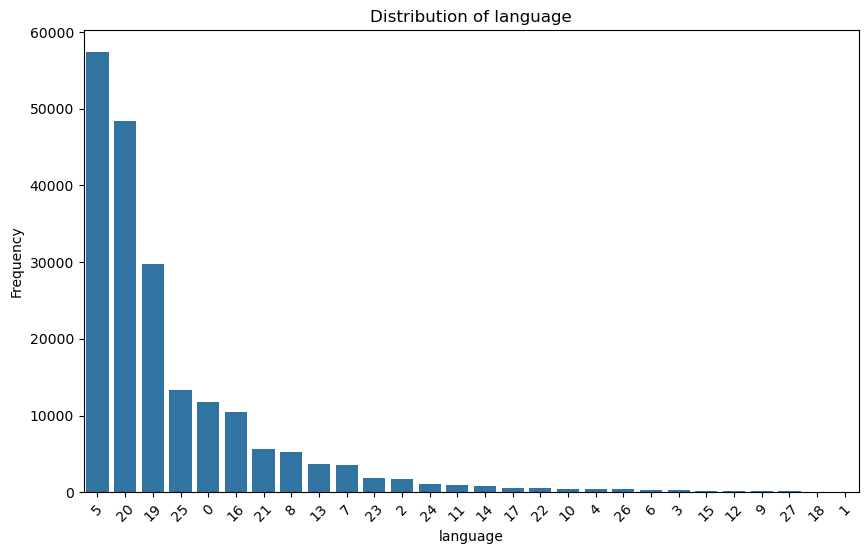

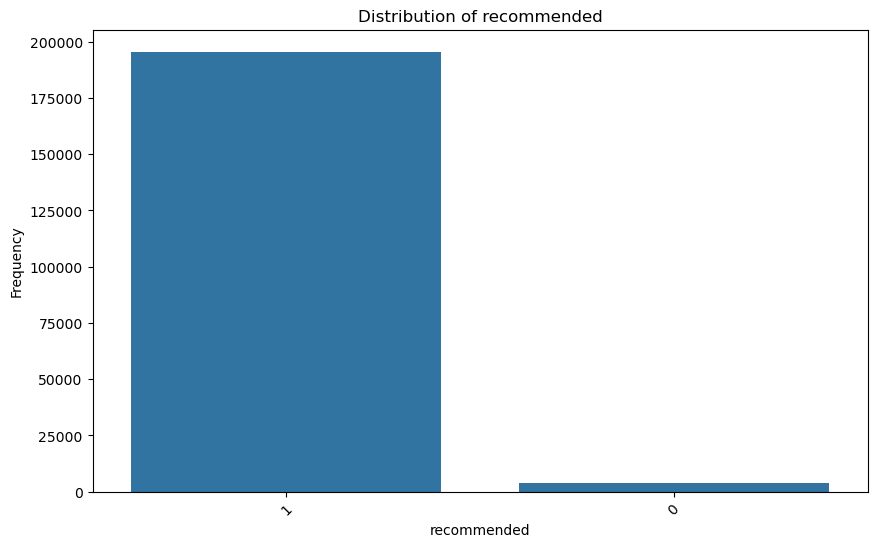

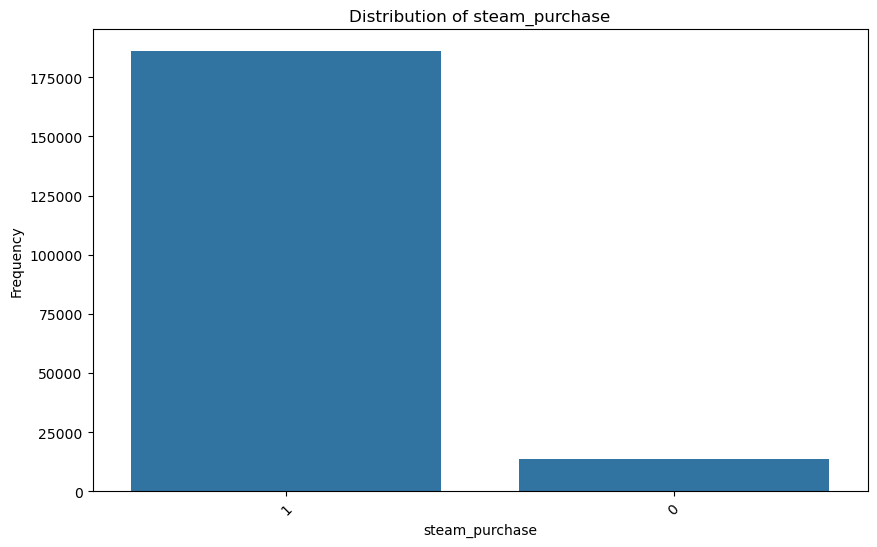

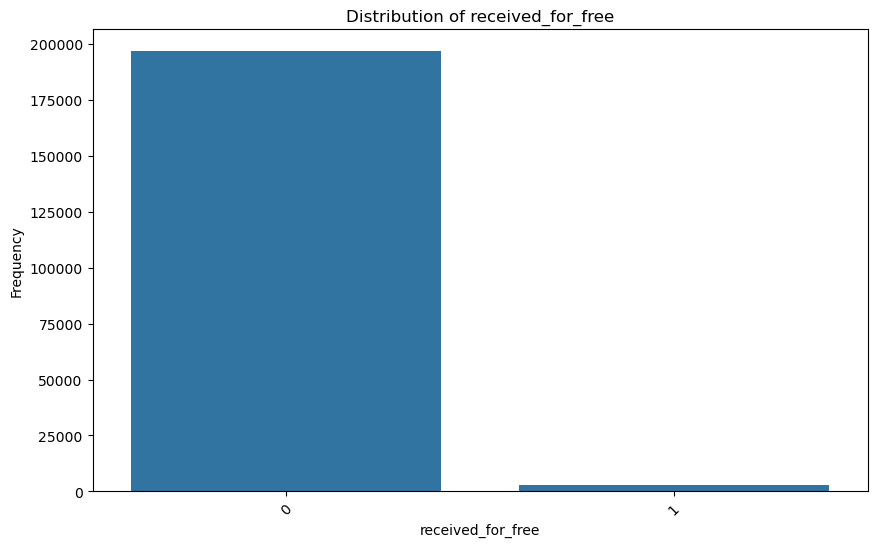

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['language', 'recommended', 'steam_purchase', 'received_for_free']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cleaned, x=col, order=df_cleaned[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


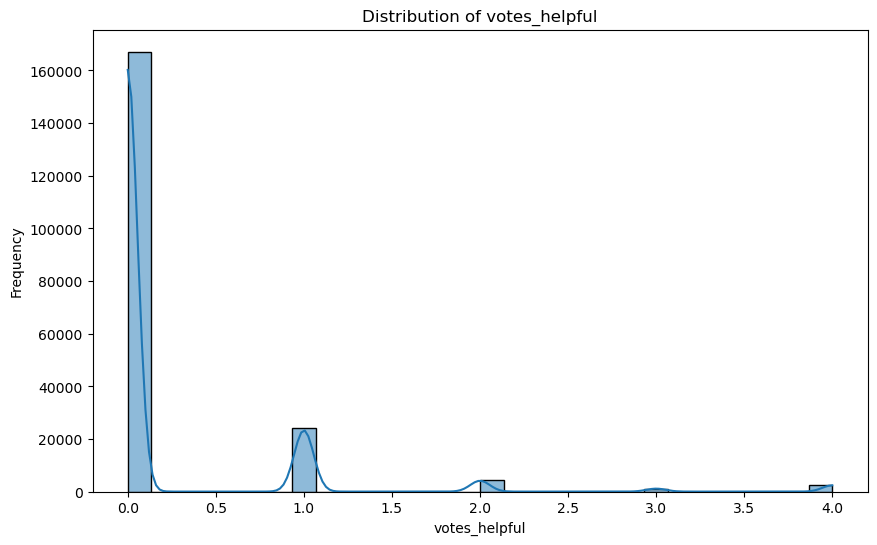

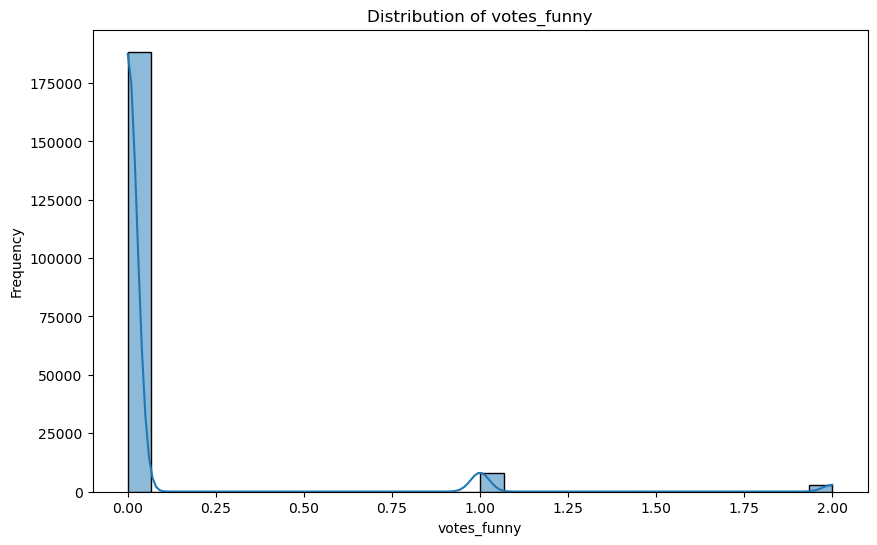

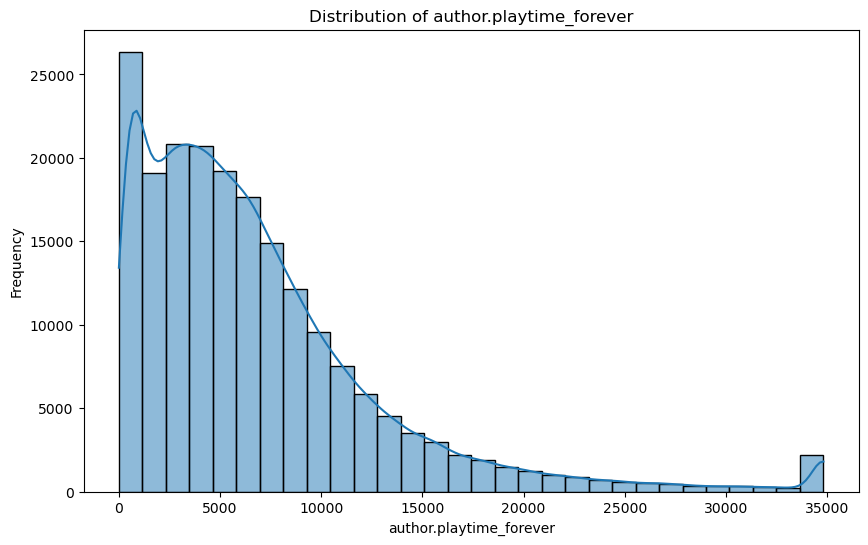

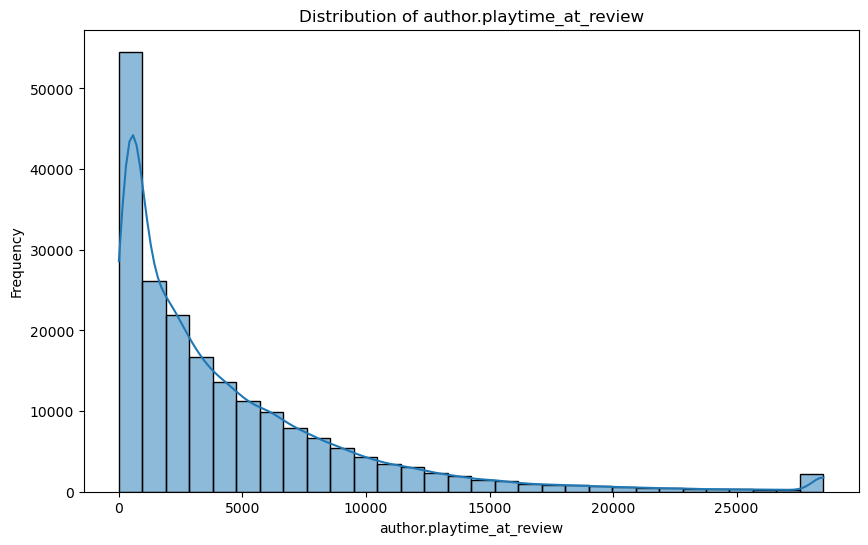

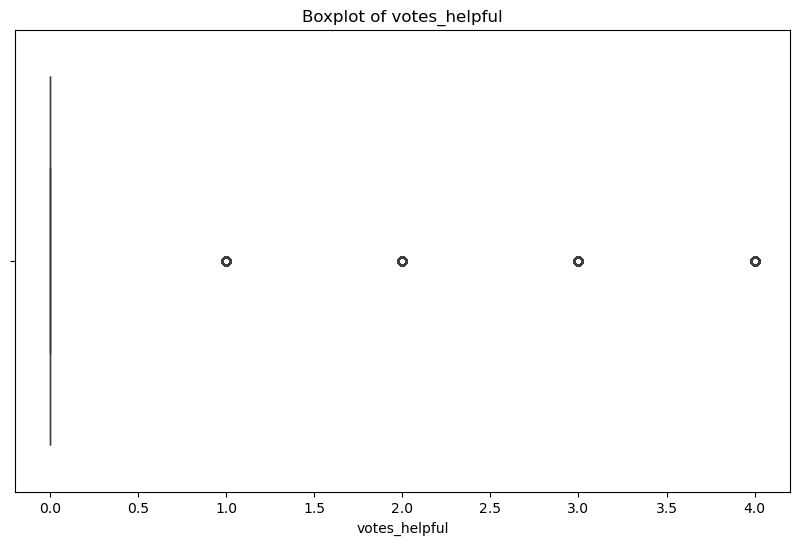

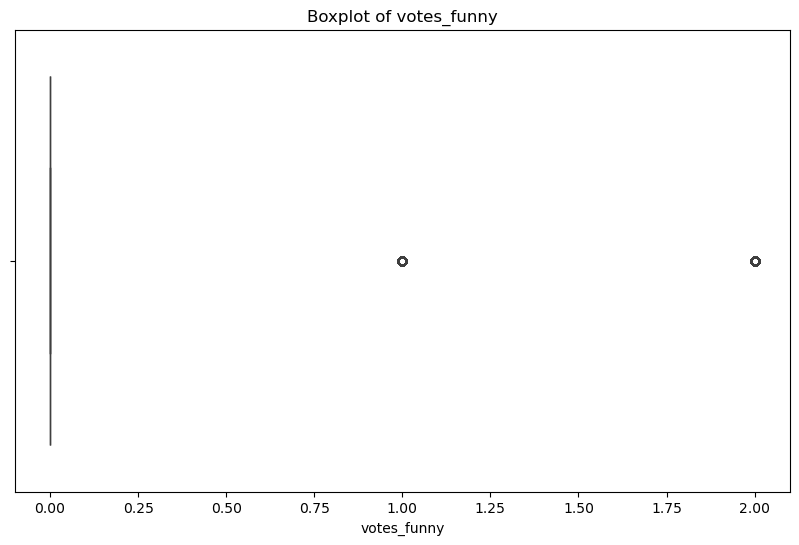

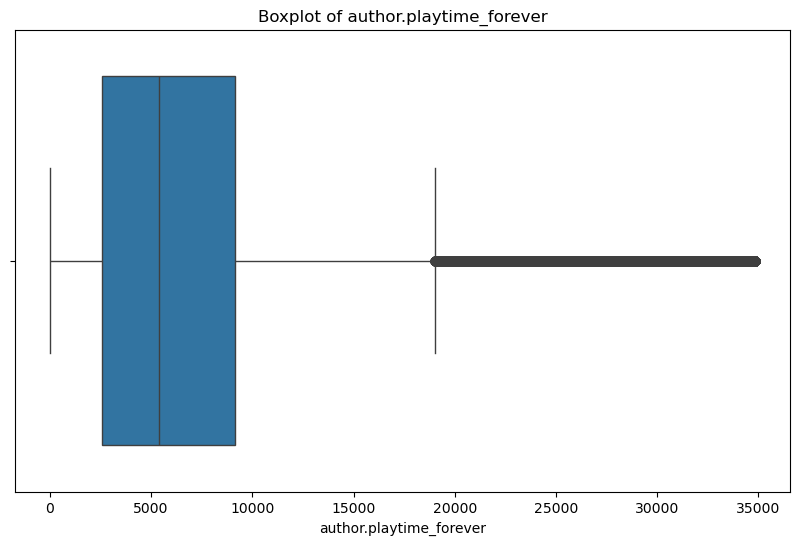

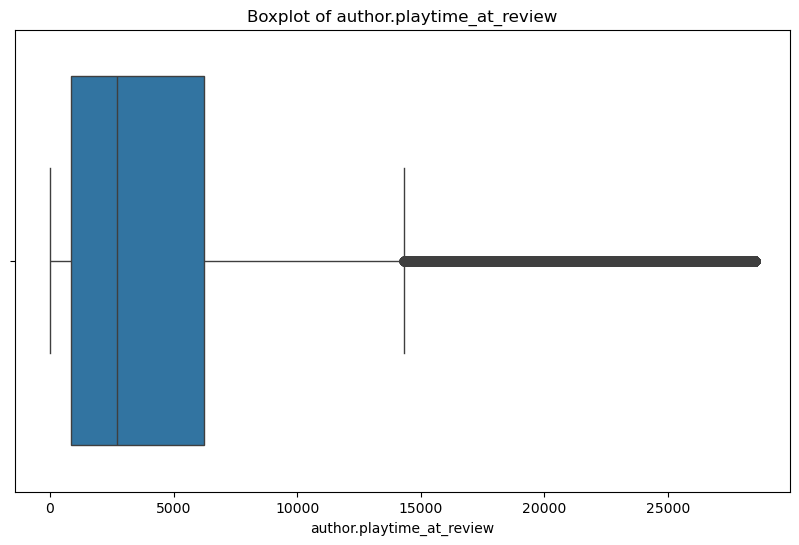

In [19]:
numeric_columns = ['votes_helpful', 'votes_funny', 'author.playtime_forever', 'author.playtime_at_review']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_cleaned, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


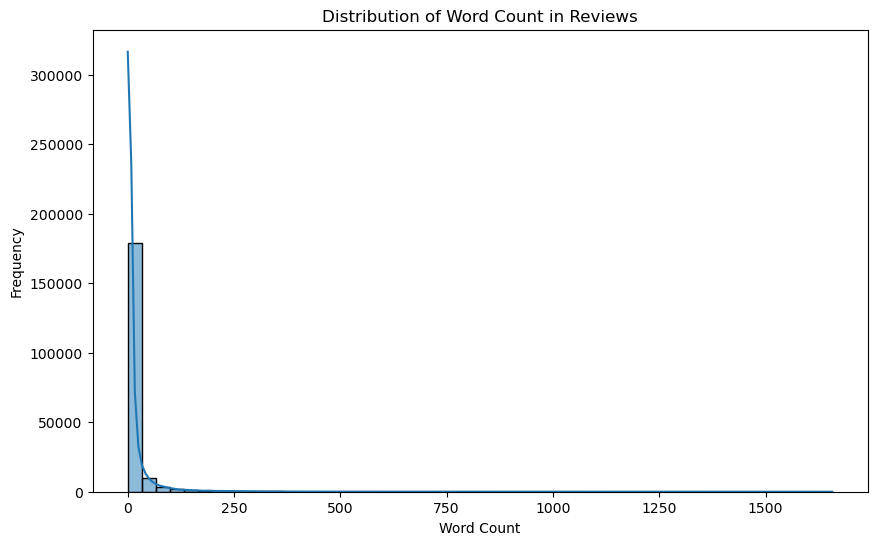

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['review_word_count'], bins=50, kde=True)
plt.title('Distribution of Word Count in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


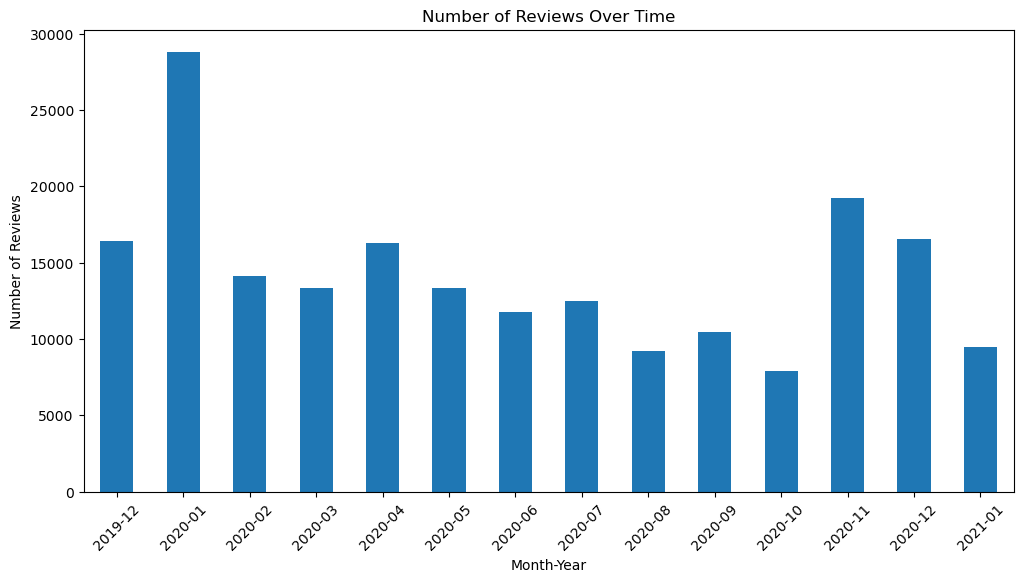

In [21]:
df_cleaned['review_month_year'] = df_cleaned['timestamp_created'].dt.to_period('M')

plt.figure(figsize=(12, 6))
df_cleaned['review_month_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


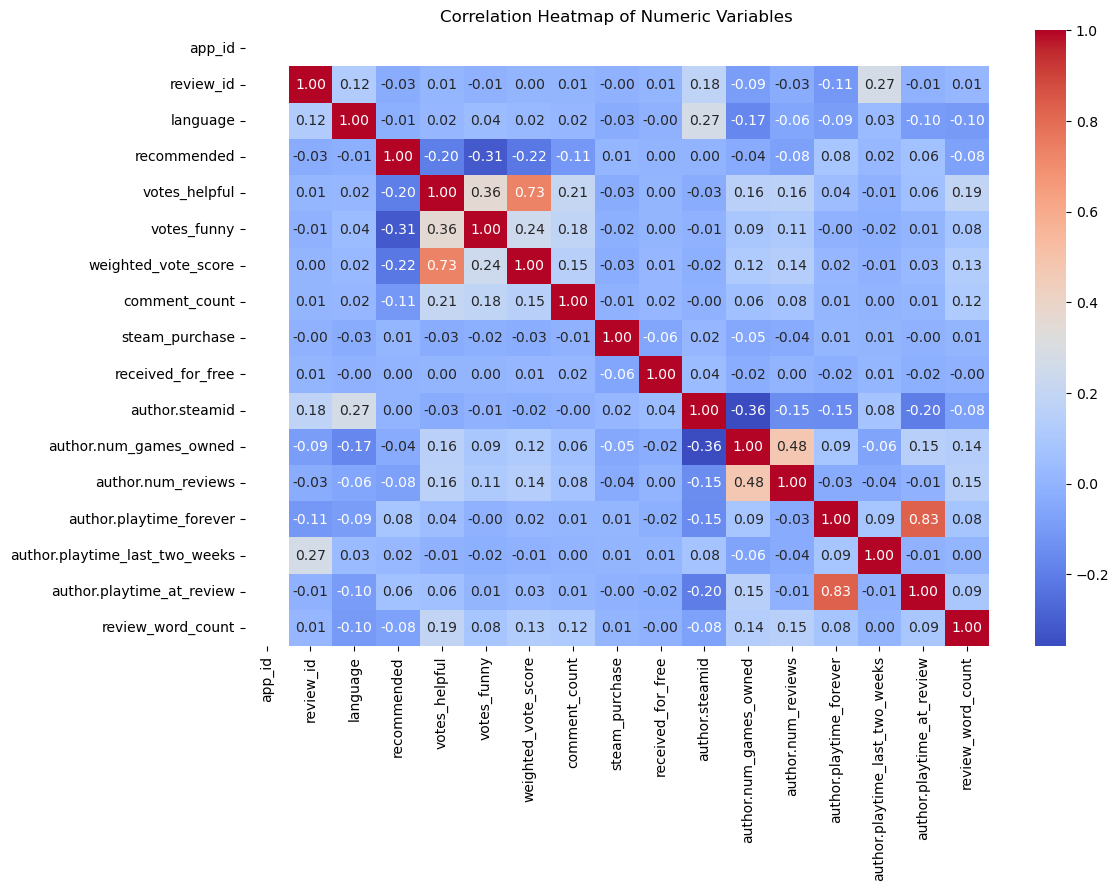

In [26]:
numeric_data = df_cleaned.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


In [27]:
output_path = 'gs://steam-reviews-bucket/cleaned/steam_reviews_cleaned.parquet'

df_cleaned.to_parquet(output_path, index=False)

print(f"Cleaned data saved to {output_path}")

Cleaned data saved to gs://steam-reviews-bucket/cleaned/steam_reviews_cleaned.parquet
